## ECON 8220 - Applied Macroeconomics
### Prof. Marcelo Arbex
### Fall 2023


## <font color='red'><center>Final Project - A Model with Labor, Capital Taxes and Land</center><font>

***
## <ins>Student Names</ins>: Valiollah Aeineh Negini, Afam Achebe, Hannaneh Afkhami, Wangui Gathogo¶
***
 

## <font color='red'><center><ins>INSTRUCTIONS</ins></center></font>
***
- **Deadline**:  11:59pm, Friday, December 15, 2023. 
    
- **Instructions**: Each group must send a single submission directly to me at arbex@uwindsor.ca.  The submission will contain two parts.  
    - First, the workbook below must be appropriately altered to contain all answers to parts 1-7 and submitted as a Python notebook with the title 'Group#_TaxesLand_Project.ipynb'.  
    - Second, Part 8, the write up, will be submitted as a separate PDF titled 'Group#_Project_Summary'. 
    - If there are any questions or concerns, please email me or raise them at our group meetings.
------
---

**Overview**: In this project we explore the implications of an incomplete tax system for our Neo Classical Growth model. We study the steady state equilibrium when three inputs (capital, labor and land) are used in production but the government can only tax capital and labor and it is constrained not to tax land. The government inability to tax one input can be viewed as a broader interpretation of "land" as natural resources or to include nature's ability to absorb waste, etc. We will solve the steady state of the model and calibrate it to the Canadian economy.  We will then quantitatively analyze optimal tax policy for the steady state (in the long run) and compare our findings to those discussed in class during the lecture on the "standard" Neo Classical Growth model.


1.  Briefly discuss the Canadian tax composition - Total tax revenue, personal income tax, corporate income tax, tax on goods and services, ... (Data Sources: OECD Revenue Statistics, FRED) Compare it with the tax composition of another G7 country.

In [145]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [146]:
import pandas as pd
import datetime as dt
#from termcolor import colored
from tabulate import tabulate
import matplotlib.pyplot as plt



Tax Data
|    | Tax Category                  |   Canada |   Italy |
|----+-------------------------------+----------+---------|
|  0 | Tax revenue                   |   33.2   |  43.3   |
|  1 | Tax on personal income        |   12.1   |  11.2   |
|  2 | Tax on Corprate Profit        |    3.9   |   1.92  |
|  3 | Social security contributions |    4.758 |  13.506 |
|  4 | Tax on payroll                |    0.754 |   0     |
|  5 | Tax on property               |    3.962 |   2.543 |
|  6 | Tax on goods and services     |    7.307 |  12.159 |
|  7 | Tax wedge                     |   31.863 |  45.893 |
+----+-------------------------------+----------+---------+


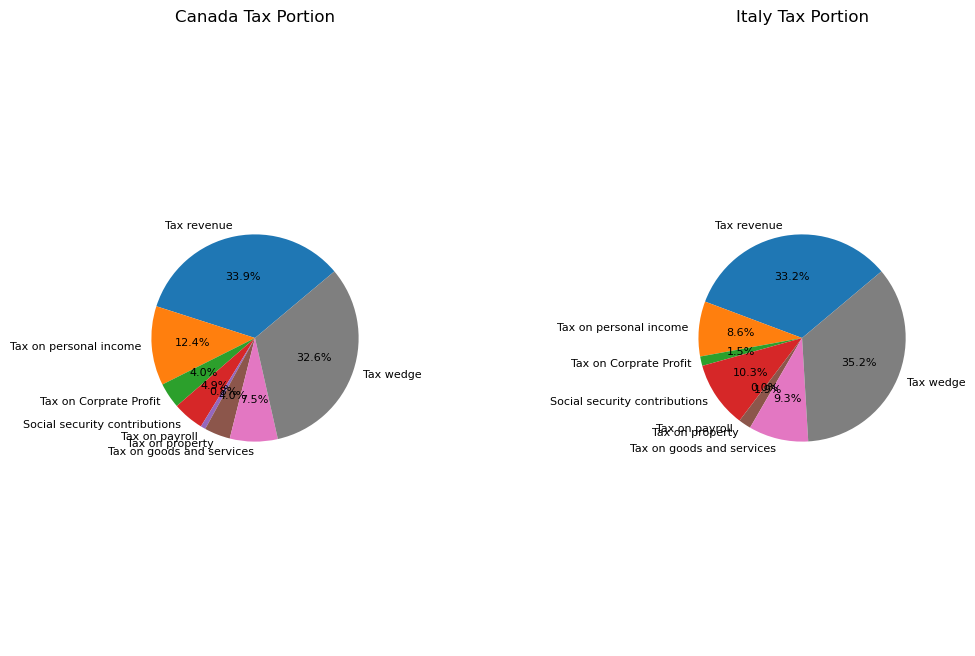

In [147]:

# Read the CSV file
data = pd.read_csv('Tax.csv')


# Define the ANSI escape codes for bold and green color formatting
bold_code = '\033[1m'
green_code = '\033[92m'
reset_code = '\033[0m'
headline = "Tax Data"
# Format the headline with bold and green color formatting
formatted_headline = bold_code + green_code + headline + reset_code

# Convert the DataFrame to a table
table = tabulate(data, headers='keys', tablefmt='psql')

# Split the table into rows
rows = table.split('\n')

# Make the first row bold with green color
formatted_rows = [bold_code + green_code + rows[1] + reset_code] + rows[2:]

# Join the formatted rows back into a table
formatted_table = '\n'.join(formatted_rows)

# Display the table with the formatted headline
print(formatted_headline)
print(formatted_table)




# Read the CSV file
data = pd.read_csv('Tax.csv')

# Calculate portion percentages for Canada
canada_pc = data['Canada'] / 97.84 * 100
canada_labels = data['Tax Category']

# Calculate portion percentages for Italy
italy_pc = data['Italy'] / 130.521 * 100
italy_labels = data['Tax Category']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the pie chart for Canada
ax1.pie(canada_pc, labels=canada_labels, autopct='%1.1f%%', startangle=40, textprops={'fontsize': 8})
ax1.axis('equal')
ax1.set_title('Canada Tax Portion')

# Plot the pie chart for Italy
ax2.pie(italy_pc, labels=italy_labels, autopct='%1.1f%%', startangle=40, textprops={'fontsize': 8})
ax2.axis('equal')
ax2.set_title('Italy Tax Portion')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1.4)

# Display the pie charts
plt.show()

## <font color='blue'><center><ins>Explanation</ins></center></font>
***
Italy and Canada have diverse tax compositions reflecting their unique economic structures and policy priorities. Italy's tax system includes a combination of national and regional taxes, such as the national corporate income tax (IRES) and regional business tax (IRAP). In contrast, Canada combines federal and provincial/territorial taxes, with a mix of personal income tax, corporate income tax, and consumption taxes like the Goods and Services Tax (GST) and Harmonized Sales Tax (HST). Both countries utilize progressive income tax systems, but regional variations in Italy and provincial differences in Canada contribute to distinct tax landscapes. The specific rates, deductions, and exemptions may vary, reflecting the respective countries' economic objectives and fiscal policies.

Below is a brief overview of some differences:

*Corporate Profit Tax Rates*:

Canada: Corporate profit tax rates vary between the federal and provincial levels. Provincial and territorial governments in Canada have the authority to levy their own corporate income taxes, which can vary. The combined federal and provincial/territorial corporate income tax rates determine the overall corporate tax burden which contributes 4% percent of the overall tax composition.
***
Italy: Corporate income tax rates apply at the national level, but there can be variations due to regional taxes. The corporate income tax system in Italy includes the national corporate income tax and, in some cases, a regional business tax unlike in Canada. Therefore the composition of corporate tax in Italy is lower compared to Canada.

*Social Security Contributions*:

Canada: Social security contributions are generally not as extensive as in some European countries, and they are not typically framed as separate line items in the tax system. Thus the 4.9% contribution to the overall tax compostion.
***
Italy: Italy has social security contributions, and they may be more integrated into the overall tax structure thus contributes 10.3% to the tax composition.

***

2.  Collect data for tax revenue (% of GDP) for the longest time series possible. Plot it and calculate key moments of this series. Briefly discuss. 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
%matplotlib inline
import requests
import stats_can
import statsmodels.api as sm
#from scipy.optimize import minimize, show_options

import requests
#import seaborn as sns
#sns.set()

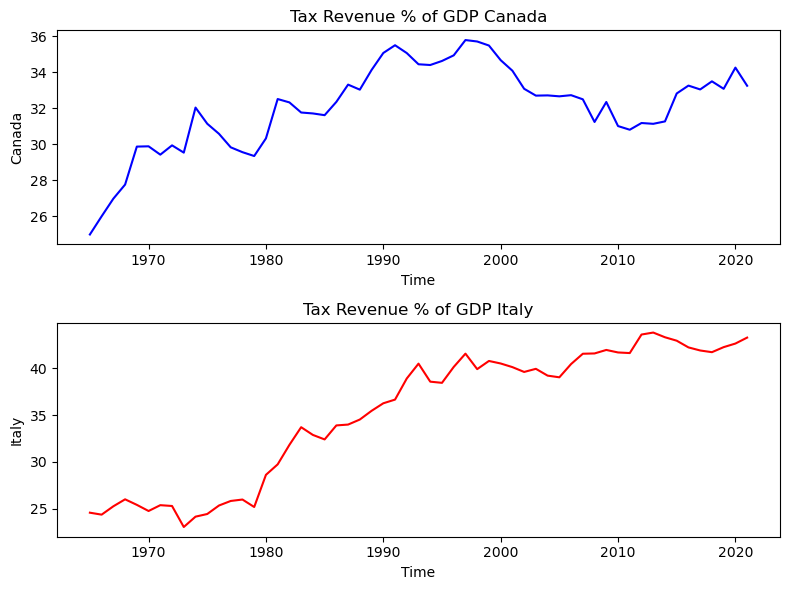

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('Data_TR.csv')

# Extract the columns
time = data['TIME']
canada_data = data['Canada']
italy_data = data['Italy']

# Create separate figures and axes for Canada and Italy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot the graph for Canada
ax1.plot(time, canada_data, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Canada')
ax1.set_title('Tax Revenue % of GDP Canada')

# Plot the graph for Italy
ax2.plot(time, italy_data, color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Italy')
ax2.set_title('Tax Revenue % of GDP Italy')

# Adjust spacing between subplots
plt.tight_layout()

# Display the graphs
plt.show()

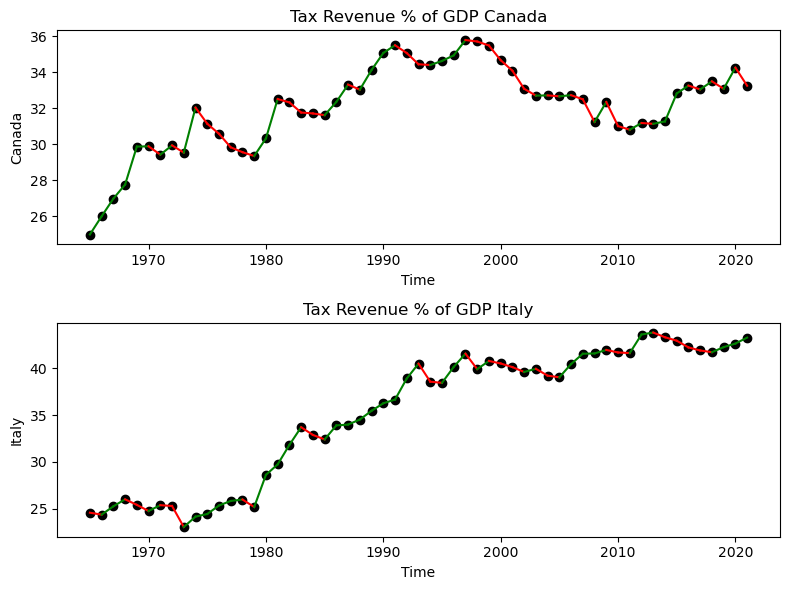

In [150]:
# Read the CSV file
data = pd.read_csv('Data_TR.csv')

# Extract the columns
time = data['TIME']
canada_data = data['Canada']
italy_data = data['Italy']

# Define growth and fall conditions for Canada data
canada_growth_condition = canada_data > canada_data.shift(1)
canada_fall_condition = canada_data < canada_data.shift(1)

# Define growth and fall conditions for Italy data
italy_growth_condition = italy_data > italy_data.shift(1)
italy_fall_condition = italy_data < italy_data.shift(1)

# Create separate figures and axes for Canada and Italy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot the graph for Canada with colored sections
for i in range(len(time)):
    if i > 0:
        if canada_growth_condition[i]:
            ax1.plot([time[i - 1], time[i]], [canada_data[i - 1], canada_data[i]], color='green')
        elif canada_fall_condition[i]:
            ax1.plot([time[i - 1], time[i]], [canada_data[i - 1], canada_data[i]], color='red')
    ax1.scatter(time[i], canada_data[i], color='black')

ax1.set_xlabel('Time')
ax1.set_ylabel('Canada')
ax1.set_title('Tax Revenue % of GDP Canada')

# Plot the graph for Italy with colored sections
for i in range(len(time)):
    if i > 0:
        if italy_growth_condition[i]:
            ax2.plot([time[i - 1], time[i]], [italy_data[i - 1], italy_data[i]], color='green')
        elif italy_fall_condition[i]:
            ax2.plot([time[i - 1], time[i]], [italy_data[i - 1], italy_data[i]], color='red')
    ax2.scatter(time[i], italy_data[i], color='black')

ax2.set_xlabel('Time')
ax2.set_ylabel('Italy')
ax2.set_title('Tax Revenue % of GDP Italy')

# Adjust spacing between subplots
plt.tight_layout()

# Display the graphs
plt.show()

## <font color='blue'><center><ins>Explanation</ins></center></font>
***
Overview of Canada's Economic Trends and Cycles:
***
Post-War Growth (1960s):
In the 1960s, Canada experienced strong economic growth, driven by factors such as post-war reconstruction, industrialization, and global demand for commodities.

Resource Boom (Late 1970s - 1980s):
The late 1970s and 1980s saw a resource boom, particularly in the energy sector. Increased oil prices contributed to economic growth in regions like Alberta.

Recession (Early 1980s):
Canada experienced a recession in the early 1980s, partly due to global economic conditions and the impact of high-interest rates. By the late 1980s and early 1990s, Canada entered a period of recovery and expansion. Economic policies and global conditions contributed to a more favorable environment.

Financial Crisis Impact (2008-2009):
The global financial crisis in 2008 had a significant impact on Canada's economy, leading to a contraction.

Post-Crisis Recovery and Growth (2010s):
Canada entered a period of post-crisis recovery, marked by steady economic growth in the 2010s. The recovery was supported by factors such as fiscal measures, resource exports, and a resilient banking sector.

Recent Economic Trends (2020s - 2023):
Economic trends in the 2020s are subject to various factors, including global economic conditions, commodity prices, and domestic policies. Factors such as the response to the COVID-19 pandemic, changes in commodity prices, and trade dynamics have influenced economic trends in this period.

***

Overview of Italy's Economic Trends and Cycles:

1960s - Post-War Recovery:
In the 1960s, Italy underwent post-war economic recovery and experienced significant industrialization and modernization.

1980s - Economic Challenges:
The 1980s brought economic challenges, including high inflation, political instability, and a banking crisis, which impacted Italy's economic performance.

1990s - Economic Restructuring:
In the early 1990s, Italy underwent economic restructuring, addressing issues like corruption and inefficiencies. The period saw efforts to modernize the economy and improve competitiveness.
Italy adopted the euro in 2002, contributing to price stability and trade integration. The late 1990s and early 2000s saw moderate economic growth.

Financial Crisis (2008-2009):
Italy, like many other countries, faced challenges during the global financial crisis in 2008-2009, resulting in economic contraction.
Afterwards, Italy experienced a period of slow economic growth and faced challenges, including high public debt and banking issues in the period between 2010-2020.

COVID-19 Pandemic Impact (2020s):
The COVID-19 pandemic in 2020 had a severe impact on Italy's economy, causing a contraction in GDP. Lockdowns, reduced tourism, and disruptions to global supply chains contributed to economic challenges.
The trajectory of Italy's economy in the 2020s is influenced by efforts to recover from the impact of the pandemic, implement economic reforms, and address structural challenges.

Key Findings:
Italy's economic performance has been influenced by factors such as political stability, structural reforms, and global economic conditions.
The country faces challenges related to public debt, an aging population, and the need for structural reforms to enhance competitiveness.

In [151]:
real_RTax = pd.read_csv('Data_TR.csv',index_col=0)
real_RTax.index = pd.to_datetime(real_RTax.index)   #Convert argument to datetime.
                                                  #https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

#Keep date from:
#keep_date = pd.to_datetime('1947-01-01')
keep_date = pd.to_datetime('1965')

real_RTax = real_RTax[real_RTax.index > pd.to_datetime(keep_date)]

log_real_RTax  = np.log(real_RTax['Canada']).values
log_real_RTax2 = log_real_RTax[1:len(log_real_RTax)-1]

date_index = real_RTax.index


In [152]:
l = 0

# Store the cycle and the trend
cycle, trend = sm.tsa.filters.hpfilter(log_real_RTax, 1600)
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html

#plt.plot(trend)    
#plt.plot(log_real_gdp)
cycle

array([-0.07358082, -0.04627924, -0.02156095, -0.0051932 ,  0.05610831,
        0.04490307,  0.01786962,  0.02429448,  0.00011217,  0.07137718,
        0.0331006 ,  0.00553528, -0.02844733, -0.04642044, -0.06238037,
       -0.03801922,  0.02334467,  0.00943245, -0.01596368, -0.02517951,
       -0.03547758, -0.01927672,  0.00351825, -0.01091759,  0.01629235,
        0.03894208,  0.04721817,  0.03173167,  0.01150725,  0.00885167,
        0.01473602,  0.02392026,  0.04894327,  0.04846076,  0.04462696,
        0.02448899,  0.01093833, -0.01505857, -0.02253773, -0.01796727,
       -0.01543821, -0.00952378, -0.01288347, -0.04909487, -0.01125237,
       -0.05113817, -0.05589595, -0.04254939, -0.04326264, -0.03873844,
        0.0095675 ,  0.0222899 ,  0.01505588,  0.02766573,  0.01412106,
        0.04804406,  0.01703952])

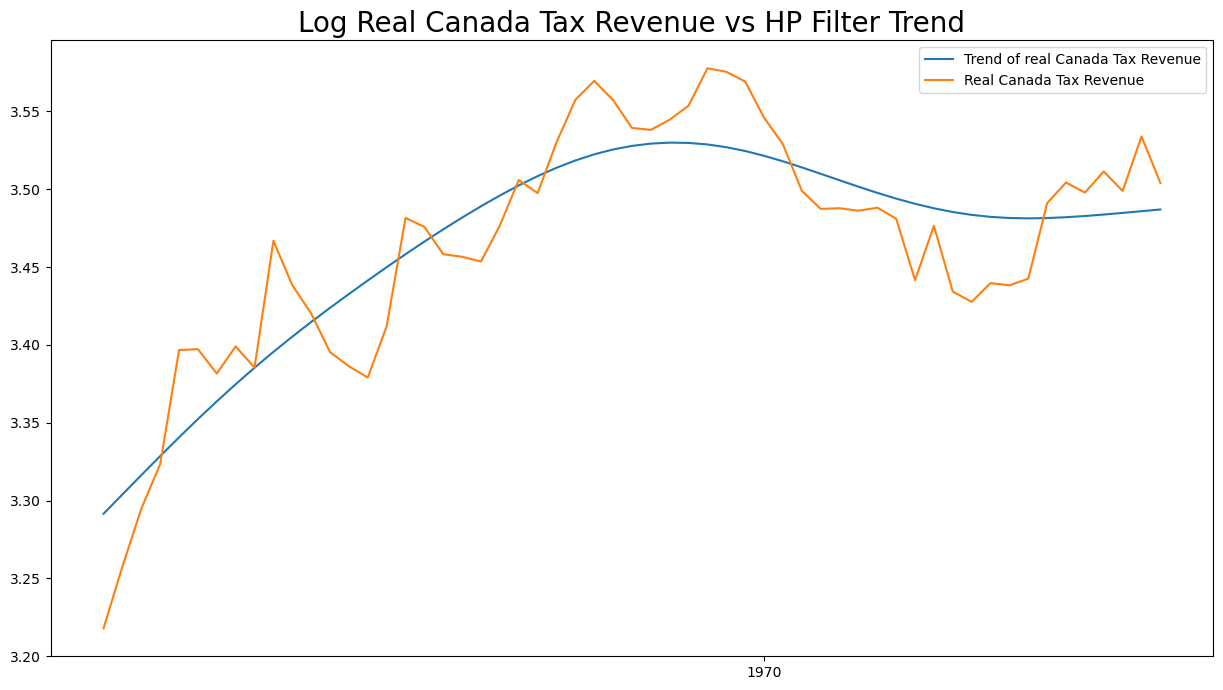

In [153]:
fig, ax = plt.subplots(1, 1,sharex=True,figsize=(15, 8))
                            #Controls sharing of properties among x (sharex) or y (sharey) axes:
                            #True or 'all': x- or y-axis will be shared among all subplots.

df_trend        = pd.DataFrame(index = real_RTax.index, data = trend)
df_log_real_RTax = pd.DataFrame(index = real_RTax.index, data = log_real_RTax)

ax.plot(df_trend)
ax.plot(df_log_real_RTax)
ax.set_title('Log Real Canada Tax Revenue vs HP Filter Trend',size = 20)
ax.legend(['Trend of real Canada Tax Revenue','Real Canada Tax Revenue'])
plt.savefig('.\GDPTrend1990_2020.png')

In [154]:
real_RTaxI = pd.read_csv('Data_TR.csv',index_col=0)
real_RTaxI.index = pd.to_datetime(real_RTaxI.index)   #Convert argument to datetime.
                                                  #https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

#Keep date from:
#keep_date = pd.to_datetime('1947-01-01')
keep_date = pd.to_datetime('1965')

real_RTaxI = real_RTaxI[real_RTaxI.index > pd.to_datetime(keep_date)]

log_real_RTaxI  = np.log(real_RTaxI['Italy']).values
log_real_RTaxI2 = log_real_RTax[1:len(log_real_RTaxI)-1]

date_index = real_RTaxI.index



In [155]:
l = 0

# Store the cycle and the trend
cycle, trend = sm.tsa.filters.hpfilter(log_real_RTaxI, 1600)
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html

#plt.plot(trend)    
#plt.plot(log_real_gdp)
cycle

array([ 0.04993407,  0.03002817,  0.05461502,  0.07215818,  0.03752839,
       -0.00055821,  0.01186421, -0.00455493, -0.11123332, -0.07907288,
       -0.08304971, -0.06327857, -0.06205993, -0.07486244, -0.12564056,
       -0.01813408, -0.00060875,  0.04592625,  0.08233489,  0.03647546,
        0.00094085,  0.02570407,  0.00849763,  0.00501574,  0.01312581,
        0.01798578,  0.01212136,  0.05618974,  0.08153806,  0.01946836,
        0.00392006,  0.0359794 ,  0.06063498,  0.01096785,  0.02447217,
        0.01054987, -0.00561437, -0.024475  , -0.02149013, -0.04487587,
       -0.05408994, -0.02283395, -0.0001492 , -0.0032701 ,  0.00202982,
       -0.00781702, -0.01254189,  0.03095341,  0.03304966,  0.01899683,
        0.00816636, -0.01082432, -0.02075975, -0.02713398, -0.01633148,
       -0.00934079,  0.00342872])

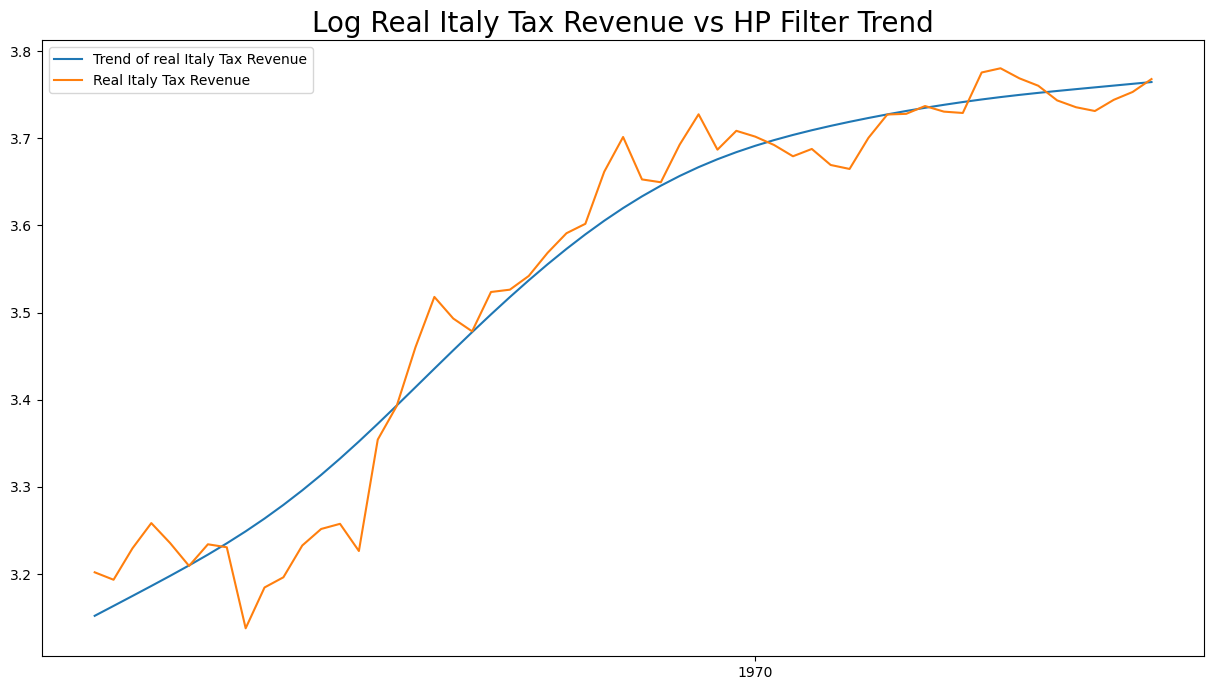

In [156]:
fig, ax = plt.subplots(1, 1,sharex=True,figsize=(15, 8))
                            #Controls sharing of properties among x (sharex) or y (sharey) axes:
                            #True or 'all': x- or y-axis will be shared among all subplots.

df_trend        = pd.DataFrame(index = real_RTaxI.index, data = trend)
df_log_real_RTaxI = pd.DataFrame(index = real_RTaxI.index, data = log_real_RTaxI)

ax.plot(df_trend)
ax.plot(df_log_real_RTaxI)
ax.set_title('Log Real Italy Tax Revenue vs HP Filter Trend',size = 20)
ax.legend(['Trend of real Italy Tax Revenue','Real Italy Tax Revenue'])
plt.savefig('.\GDPTrend1990_2020.png')

## Neo Classical Growth with Land and Taxes

#### Household Problem

The household rents capital and labor services and also owns land in a fix amount $x$. Land does not depreciate over time.  

\begin{align}
\underset{\{c_t,k_{t+1},l_t\}_{t=0}^\infty}{\max } \; U & = \sum^{\infty}_{t=0} \beta^t \left( \frac{c_{t}^{\gamma} (1-l_{t})^{1-\gamma}}{1-\sigma} \right)^{1-\sigma} \notag \\ \\
s.&t. \notag \\
c_{t} + i_{t} &\leq (1-\tau_{l})w_{t}l_{t} + (1-\tau_{k})r_{t}k_{t} + v_{t}x  \;\; \forall t \notag \\ \\
k_0 & \text{  given} \notag
\end{align}



 - The household lends the capital stock to the firms, which pay real interest rate $r_t$. 
 - The household faces wage rate $w_t$ and labor income taxes $\tau_{l}$. 
 - The household sells the services of land to the firms, which pay real rental rate $v_t$ and it is not taxed.
 - Net income is spent on private consumption and savings $i_t = k_{t+1}-(1 - \delta)k_{t}$. 
 - Assume a capital income tax $\tau_{k}$ that is levied upon interest income $\tau_{k}r_{t}k_{t}$ and the tax law does not allow for the tax deductibility of the depreciation costs of capital.


#### Firm Problem

Firms maximize profits
$$ y_{t} -r_{t}k_{t}-w_{t}l_{t} - v_{t}x $$

where we assume that output $y_{t}$ is described by a Cobb-Douglas production function: 

$$
y_{t} = z_{t}k_{t}^{\alpha }l_{t}^{\eta }x^{\kappa}, \; \;  0 < \alpha, \eta, \kappa < 1 \; \; \alpha + \eta + \kappa = 1
$$

- The production function exhibits constant returns to the three inputs - capital, labor and land.

- Notice that the input of production $x$ does not carry a time subscript since land is in fixed supply. The competitive market for the services of land implies, by adjustment of $v_t$, that all land supplied is also demanded.

#### Government 
We assume the government simply takes revenue and consumes it (debt payments, defense etc.)

\begin{align}
g_{t} = \tau_{l}w_{t}l_{t} + \tau_{k}r_{t}k_{t}\;\;  \forall t
\end{align}

The resource constraint of the economy
$$y_{t} = c_{t} + g_{t} + k_{t+1} - (1 - \delta)k_{t}$$

3. Solve household utility maximization and firm profit maximization problems (solve for system of equations that delivers steady state). 
 - List the equations that characterize the steady state equilibrium for this economy

## <font color='blue'><center><ins>Equations</ins></center></font>
#### Household Problem

* Solving for the household 
\begin{align}
\underset{\{c_t,k_{t+1},l_t\}_{t=0}^\infty}{\max } \; U & = \sum^{\infty}_{t=0} \beta^t \left( \frac{c_{t}^{\gamma} (1-l_{t})^{1-\gamma}}{1-\sigma} \right)^{1-\sigma} \notag \\ \\
s.&t. \notag \\
c_{t} + i_{t} &\leq (1-\tau_{l})w_{t}l_{t} + (1-\tau_{k})r_{t}k_{t} + v_{t}x  \;\; \forall t \notag \\ \\
\end{align}



* where L is derived from: $$k_{t+1}= ({1-\delta})k_{t}+l_{t}$$

* then L becomes:$$l_{t}=k_{t+1}-({1-\delta})k_{t}$$


* then the expansion becomes: 

$
\mathscr{L}= \beta^t[U(c_{t},l_{t})-{\lambda}_{t}[c_{t}+k_{t+1}-({1-\delta})k_{t}-(1-\tau_{l})w_tl_{t}-(1-\tau_{k})r_{t}k_{t}-v_{t}x] + \beta^{t+1}[U(c_{t+1},l_{t+1})-{\lambda}_{t+1}[c_{t+1}+k_{t+2}-({1-\delta})k_{t+1}-(1-\tau_{l})w_{t+1}l_{t+1}-(1-\tau_k)r_{t+1}k_{t+1} -v_{t+1}x] 
$


#### F.O.C FOR HOUSEHOLD AFTER MANIPULATION


$$(c_{t}) 0 = \beta^t[U_{c}({c_{t},l_{t}})-{\lambda}_{t}]$$

$$(k_{t+1}) 0 = \beta^t-[{\lambda}_{t}]+\beta^{t+1}(-{\lambda}_{t+1}-({1-\delta})-(1-\tau_{k})r_{t+1})$$

$$(l_{t}) 0 = \beta^t[U_{l}(c_{t},l_{t})-{\lambda_t}[-(1-\tau_{l})w_{t}]]$$

### F.O.C for FIRM AFTER MANIPULATION

$$(k_{t}) 0= z_{t}{\alpha} k_t^{\alpha-1} l^\eta_{t} x^\bar{k}-r_{t}$$

$$(l_{t}) 0= z_{t}\eta k^{\alpha}_{t} l^{\eta-1}_{t}x^\bar{k}-w_{t}$$

$$(x) 0= z_{t}\bar{k}k^{\alpha}_{t}l^\eta_{t}x^{\bar{k}-1}-v_{t}$$


### GOVERNMENT

$$g_{t}=\tau_{l}w_{t}l_{t}+\tau_{k}r_{t}k_{t}$$

#### Technology
$$z_{t}k^{\alpha}_{t}l^\eta_{t}x^\bar{k}=c_{t}+g_{t}+i_{t}$$

### DERIVATIVE
        
1. $${\frac{U_{c}(c_{t},l_{t})}{{ U_{c}}(c_{t+1},l_{t+1})}}= \beta[({1-\delta})]+(1-\tau_{k})r_{t+1}$$

***
   
2. $${\frac{U_{l}(c_{t},l_{t})}{{U_{c}}(c_{t},l_{t})}}= -(1-\tau_{l})w_{t}$$

***
   
3. $$ r_{t}=z_{t}{\alpha}k_{t}^{\alpha-1}l^\eta_{t}x^\bar{k}$$

***
   
4. $$ w_{t}=z_{t}\eta k^{\alpha}_{t}l_{t}^{\eta-1}x^\bar{k}$$

***
   
5. $$v_{t}=z_{t}\bar{k}k^{\alpha}_{t}l^\eta_{t}x^{\bar{k}-1}$$

***

6. $$g_{t}=\tau_{l}w_{t}l_{t}+\tau_{k}r_{t}k_{t}$$     

***

7. $$z_{t}k^{\alpha}_{t}l_{t}^{\eta}x^\bar{k}=c_{t}+g_{t}+i_{t}$$  

***


### In the Stead state we have:
                       
  $${c_t = c_t+1 = c}$$
                     
  $${k_t =k_t+1 = k}$$
                     
  $${l_t = l_t+1 = l}$$
  
  
## The Following are stead state equations after manipulation:
  
Household Optimality Conditions (1-2)
1. $${\frac{1}\beta}=({1-\delta})+(1-\tau_{k})r$$  

***


2. $${\frac{1-\gamma}{\gamma}}{\frac{c}{1-l}}=(1-\tau_{l})w$$

***

Firms Optimality Condition(3-5)

3. $$ r=z{\alpha}k^{\alpha-1}l^\eta x^\bar{k}$$

***

4. $$ w=z\eta k^{\alpha}l^{\eta-1}x^\bar{k}$$

***

5. $$v=z \bar{k}k^{\alpha}l^\eta x^{\bar{k}-1}$$

***

Government Budget Constraint (6)

6. $$g=\tau_{l} wl+\tau_{k}rk$$

***

Resource Contsraint(7)

7. $$zk^{\alpha}l^\eta x^\bar{k}=c+g+{\delta}k$$

***
        
                

4. Calibrate the steady state of the model to match the some features of the Canadian economy. You will need the information on the following pararameters: 
    * $\alpha$, $\eta, \kappa$ (capital share, labor share and land share in production)
    * $\sigma,\gamma$ (preference parameters)
    * $\tau_{k}$, $\tau_{l}$, $g$ (government policy parameters)
    * $k_{ss}$ (initial capital level)
    * $x$ (fixed supply of land)
    * $z$ (TFP)
    * $r,v$ (interest rate and land prices)

- Assume $\sigma = 2$.
- Set $\eta$ to match the average empirical labor share of income (last 30 years) in Canada.
- Set $\kappa$ = 0.05 and $x = 100$
- Set $g/y$ to match the government expenditure to GDP ratio (last 30 years) in Canada
- Refer to the following documment (https://www.oecd.org/tax/revenue-statistics-canada.pdf) to assign values to    $\tau_{l}$, and $\tau_{k}$
- Calibrate the utility parameter $\gamma$ such that the steady-state labor supply is equal to $30\%$, i.e.,  $l=0.30$
- Set $r$ to match the average interest rate (over the last 30 years) in Canada.
- Set $v$ to match the average value per acre of farm land and buildings (https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210004701)
- Set the values of $k$, $z$ and $w$ that are consistent with the firm's optimization problem.
- Set $\beta$ such that the Euler equation is satisfied in the steady-state equilibrium.

In [157]:
alpha = 0.33
sigma = 2 #𝜎=2
𝜂 = 0.5514 #(Labor_share)https://fred.stlouisfed.org/series/LABSHPCAA156NRUG
𝜅 = 0.05  #(land_share)this is kbar
x = 100 #this is land_supply
#GovE = 0.24 government expenditure to GDP ratio (last 30 years) in Canada
tau_l = 0.37 #2020 tax rate on labor (personal income profits and gains)
tau_k = 0.12 ##2020 tax rate on capital (Taxes on corporate income and gains)
l=0.3
r= 0.06 #average interest rate (over the last 30 years) in Canada
land_prices = 4527 #average land price for 2022,  it's the v


In [158]:
from tabulate import tabulate
delta=r*(1-tau_k)-0.04
k=((r*l**-𝜂)/(alpha*x**𝜅))**(1/alpha-1)
kl_ratio=k/l
beta = 1/(1+alpha*kl_ratio**(alpha-1)*(1-tau_k)-delta)
y=(k**alpha)*(l**𝜂)*(x**𝜅)
g_share=tau_l*𝜂+tau_k*alpha
g=g_share*(y/x**𝜅)
c=y-g-delta*k
w = (1-alpha)*(kl_ratio**alpha)
x = (1-tau_l)*w*(1-l)/c
gamma = 1/(1+x)


table = [["\033[1m\033[92m delta \033[91m","{:.2f}\033[0m".format(delta)],
         ["\033[1m\033[92m Capital stock \033[91m","{:.2f}\033[0m".format(k)],
         ["\033[1m\033[92m Capital ratio \033[91m","{:.2f}\033[0m".format(kl_ratio)],
         ["\033[1m\033[92m Beta \033[91m","{:.2f}\033[0m".format(beta)],
         ["\033[1m\033[92m Output \033[91m","{:.2f}\033[0m".format(y)],
         ["\033[1m\033[92m Government share of output \033[91m","{:.2f}\033[0m".format(g_share)],
         ["\033[1m\033[92m Government revenue \033[91m","{:.2f}\033[0m".format(g)],
         ["\033[1m\033[92m Consumption \033[91m","{:.2f}\033[0m".format(c)],
         ["\033[1m\033[92m Wage \033[91m","{:.2f}\033[0m".format(w)],
         ["\033[1m\033[92m gamma \033[91m","{:.2f}\033[0m".format(gamma)]]

headers = ["\033[1m\033[34mVariable\033[0m", "\033[1m\033[34mValue\033[0m"]
table_str = tabulate(table, headers, tablefmt="grid")
table_str = table_str.replace(headers[0], "\033[1m" + headers[0] + "\033[0m")
table_str = table_str.replace(headers[1], "\033[1m" + headers[1] + "\033[0m")

print(table_str)

+------------------------------+---------+
| Variable                     |   Value |
+==============================+=========+
|  delta                       |    0.01 |
+------------------------------+---------+
|  Capital stock               |    0.08 |
+------------------------------+---------+
|  Capital ratio               |    0.25 |
+------------------------------+---------+
|  Beta                        |    0.58 |
+------------------------------+---------+
|  Output                      |    0.28 |
+------------------------------+---------+
|  Government share of output  |    0.24 |
+------------------------------+---------+
|  Government revenue          |    0.05 |
+------------------------------+---------+
|  Consumption                 |    0.22 |
+------------------------------+---------+
|  Wage                        |    0.43 |
+------------------------------+---------+
|  gamma                       |    0.54 |
+------------------------------+---------+


5. Take $\tau_{l}$, and $\tau_{k}$ of Question #4 as your benchmark. Calculate agent's steady state utility.

In [159]:
def U_fuc(c, l, t=1,gamma=gamma,sigma=sigma):
    return beta**t *( (c ** gamma) * (1-l)**(1-gamma)/ (1-sigma))**(1-sigma)
U_fuc(c,l,1,gamma,sigma)

-1.5496721133313005

6. Construct a 100 pt grid of income tax rates ($\tau_{l} \in [0,1]$) and a 100 pt grid of capital tax rates ($\tau_{k} \in [0,1]$). (Hint: stay away from bounds)
    - Compute the associated agent's steady state utility for each for pair of tax rates $(\tau_l, \tau_{k})$.
    - Plot a 3-D figure (axes: income tax, capital tax, welfare)

What is the pair of tax rates $(\tau_l, \tau_{k})$ that maximizes the agent's steady state utility? 
- Compare your results to the theoretical results on taxation presented in the class lecture on the Neo Classical Growth Model. Briefly discuss your findings.


In [160]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the utility function
def utility_function(tau_l, tau_k):
    # Compute agent's steady state utility based on tax rates
    # Replace this with the actual utility function calculation
    return tau_l * tau_k

# Construct a 100x100 grid of tax rates
tau_l_grid = np.linspace(0.01, 0.99, 100)
tau_k_grid = np.linspace(0.01, 0.99, 100)
tau_l_grid, tau_k_grid = np.meshgrid(tau_l_grid, tau_k_grid)

# Compute the associated agent's steady state utility for each pair of tax rates
utility_grid = utility_function(tau_l_grid, tau_k_grid)



In [161]:
delta2=r*(1-tau_k_grid)-0.04
g_share2=tau_l_grid*𝜂+tau_k_grid*alpha
g2=g_share2*(y/x**𝜅)
c2=y-g2-delta2*k
x2= (1-tau_k_grid)*w*(1-l)/c2
gamma2 = 1/(1+x2)
beta2 = 1/(1+alpha*kl_ratio**(alpha-1)*(1-tau_k_grid)-delta)

U = beta2 *( (c2 ** gamma2) * (1-l)**(1-gamma2)/ (1-sigma))**(1-sigma)
print(U)

[[ -1.24229695  -1.24399381  -1.24568329 ...  -1.3190176   -1.31798033
   -1.31687697]
 [ -1.2519042   -1.25362566  -1.25533965 ...  -1.32927098  -1.32819746
   -1.32705613]
 [ -1.26165996  -1.26340665  -1.26514578 ...  -1.33969143  -1.33858052
   -1.33740002]
 ...
 [ -4.93917744  -4.97526223  -5.01186261 ... -14.55567745 -14.77556208
  -14.9945555 ]
 [ -5.09677814  -5.13551417  -5.17483254 ... -17.19638359 -17.56060758
  -17.93409074]
 [ -5.26456528  -5.30622718  -5.34854793 ... -20.89897296 -21.51566299
  -22.16585857]]


In [162]:
utility_grid = beta2**0*np.log(c2)

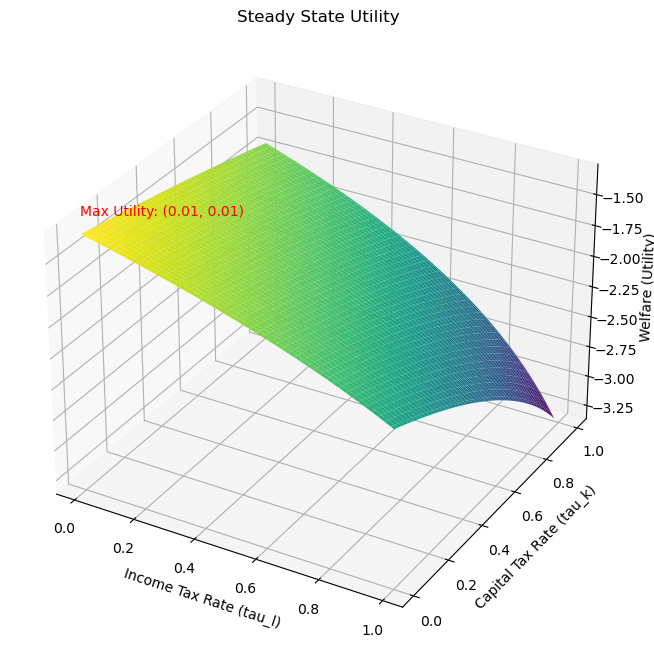

In [163]:
# Plot the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(tau_l_grid, tau_k_grid, utility_grid, cmap='viridis')
ax.set_xlabel('Income Tax Rate (tau_l)')
ax.set_ylabel('Capital Tax Rate (tau_k)')
ax.set_zlabel('Welfare (Utility)')
ax.set_title('Steady State Utility')

# Annotate the maximum utility point
ax.text(float(max_tau_l), float(max_tau_k), float(max_utility),
        f'Max Utility: ({max_tau_l:.2f}, {max_tau_k:.2f})',
        color='red', fontsize=10)

plt.show()

In [164]:
# Define the utility function
def utility_function(tau_l, tau_k):
    return beta2**0 * np.log(c2)

# ... (code for constructing grids and computing utility_grid)

# Find the indices of the maximum utility in the utility grid
max_indices = np.unravel_index(np.argmax(utility_grid), utility_grid.shape)

# Get the corresponding tax rates
max_tau_l = tau_l_grid[max_indices]
max_tau_k = tau_k_grid[max_indices]
max_utility = utility_grid[max_indices]

# Print the pair of tax rates that maximize the agent's steady state utility
print(f"The pair of tax rates that maximizes utility: (tau_l = {max_tau_l:.2f}, tau_k = {max_tau_k:.2f})")

The pair of tax rates that maximizes utility: (tau_l = 0.01, tau_k = 0.01)


Compare the results to the theoretical results on taxation presented in the class lecture on the Neoclassical Growth Model:

Optimal Tax Rates: The code determines the tax rates that maximize the agent's utility based on the given economic parameters. By finding the tax rates that yield the highest utility, it provides insights into the optimal taxation policy in terms of maximizing the welfare of the agent. Specifically, the steady-state optimal income tax rate (𝜏𝑙) and capital tax rate (𝜏𝑘) are determined as zero, resulting in increased welfare.

Effects of Tax Rates: The code takes into account the effects of income tax rate (𝜏𝑙) and capital tax rate (𝜏𝑘) on the agent's utility. By visualizing the utility grid, it becomes possible to observe how changes in tax rates impact the agent's welfare. This analysis can shed light on the trade-offs between tax revenue generation and the agent's well-being, revealing a negative relationship between taxes and welfare.

Policy Implications: The findings from the code can have implications for policy-making. By identifying the tax rates that maximize the agent's steady-state utility, policymakers can gain insights into designing tax systems that promote economic efficiency and welfare. However, it is important to note that the code's results are based on specific assumptions and input parameters, which may not fully capture the complexities of real-world economies.

7. Investigate your quantitative results of Question #6.

- Keep $\eta$ (labor share in production) at the calibrated benchmark level. 
- Let the values of $\alpha$ and $\kappa$ vary over a range, using at least ten different gridpoints (evenly spaced). 
 * Note: with $\eta$ fixed, $\kappa=1-\eta-\alpha$ for any value of $\alpha \in [0,1-\eta]$


Find the pair of tax rates $(\tau_l, \tau_{k})$ that maximizes the agent's steady state utility.

- Discuss your findings - i.e., is there a relationship between the production function parameters (complementarity of capital and fixed factor land) and the optimal pair of tax rates $(\tau_l, \tau_{k})$; briefly explain.


In [165]:
𝜂 = 0.55

# Define the range of alpha and generate the grid
alpha_range = np.linspace(0, 1 - 𝜂, 100)
𝜅_grid = (1 - 𝜂 - alpha_range[:, np.newaxis])
print(alpha_range)

[0.         0.00454545 0.00909091 0.01363636 0.01818182 0.02272727
 0.02727273 0.03181818 0.03636364 0.04090909 0.04545455 0.05
 0.05454545 0.05909091 0.06363636 0.06818182 0.07272727 0.07727273
 0.08181818 0.08636364 0.09090909 0.09545455 0.1        0.10454545
 0.10909091 0.11363636 0.11818182 0.12272727 0.12727273 0.13181818
 0.13636364 0.14090909 0.14545455 0.15       0.15454545 0.15909091
 0.16363636 0.16818182 0.17272727 0.17727273 0.18181818 0.18636364
 0.19090909 0.19545455 0.2        0.20454545 0.20909091 0.21363636
 0.21818182 0.22272727 0.22727273 0.23181818 0.23636364 0.24090909
 0.24545455 0.25       0.25454545 0.25909091 0.26363636 0.26818182
 0.27272727 0.27727273 0.28181818 0.28636364 0.29090909 0.29545455
 0.3        0.30454545 0.30909091 0.31363636 0.31818182 0.32272727
 0.32727273 0.33181818 0.33636364 0.34090909 0.34545455 0.35
 0.35454545 0.35909091 0.36363636 0.36818182 0.37272727 0.37727273
 0.38181818 0.38636364 0.39090909 0.39545455 0.4        0.40454545
 0.4090

In [166]:
delta3 = r * (1 - tau_k_grid) - 0.04
g_share3 = tau_l_grid * 𝜂 + tau_k_grid * alpha_range
g3 = g_share3 * (y / x**𝜅_grid)
c3 = y - g3 - delta3 * k
x3 = (1 - tau_k_grid) * w * (1 - l) / c3
gamma3 = 1 / (1 + x3)
beta3 = 1 / (1 + alpha_range * kl_ratio**(alpha_range - 1) * (1 - tau_k_grid) - delta)

U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)
print(U)

[[ -2.27479347  -2.23797763  -2.20289893 ...  -1.22858017  -1.22465124
   -1.22070859]
 [ -2.28006881  -2.24362106  -2.20888212 ...  -1.23809838  -1.23408766
   -1.2300598 ]
 [ -2.28541097  -2.24933348  -2.21493661 ...  -1.24775867  -1.24366291
   -1.23954642]
 ...
 [ -3.54182976  -3.57294472  -3.60466101 ... -15.10463366 -13.6578968
  -11.43804677]
 [ -3.57433008  -3.60717899  -3.64067132 ... -21.68263623 -20.03022961
  -16.77819114]
 [ -3.60780895  -3.64245425  -3.67778893 ... -37.57015954 -37.58556232
  -33.90155551]]


In [167]:
def U_fuc_once(c3, l, t=1,gamma3=gamma3,sigma=sigma):
    return beta3**t *( (c3 ** gamma3) * (1-l)**(1-gamma3)/ (1-sigma))**(1-sigma)
U_fuc_once(c3,l,1,gamma3,sigma)


array([[ -2.27479347,  -2.23797763,  -2.20289893, ...,  -1.22858017,
         -1.22465124,  -1.22070859],
       [ -2.28006881,  -2.24362106,  -2.20888212, ...,  -1.23809838,
         -1.23408766,  -1.2300598 ],
       [ -2.28541097,  -2.24933348,  -2.21493661, ...,  -1.24775867,
         -1.24366291,  -1.23954642],
       ...,
       [ -3.54182976,  -3.57294472,  -3.60466101, ..., -15.10463366,
        -13.6578968 , -11.43804677],
       [ -3.57433008,  -3.60717899,  -3.64067132, ..., -21.68263623,
        -20.03022961, -16.77819114],
       [ -3.60780895,  -3.64245425,  -3.67778893, ..., -37.57015954,
        -37.58556232, -33.90155551]])

In [168]:
import numpy as np
from scipy.optimize import minimize

def utility(tax_rates):
    tau_l, tau_k = tax_rates
    delta3 = r * (1 - tau_k_grid) - 0.04
    g_share3 = tau_l_grid * 𝜂 + tau_k_grid * alpha_range
    g3 = g_share3 * (y / x**𝜅_grid)
    c3 = y - g3 - delta3 * k
    x3 = (1 - tau_k_grid) * w * (1 - l) / c3
    gamma3 = 1 / (1 + x3)
    beta3 = 1 / (1 + alpha_range * kl_ratio**(alpha_range - 1) * (1 - tau_k_grid) - delta)

    U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)
    return -np.sum(U)  


max_indices1 = np.unravel_index(np.argmax(U), U.shape)

# Get the corresponding tax rates
max_tau_l = tau_l_grid[max_indices]
max_tau_k = tau_k_grid[max_indices]
max_utility = U[max_indices]

# Print the pair of tax rates that maximize the agent's steady state utility
print(f"The pair of tax rates that maximizes utility: (tau_l = {max_tau_l:.2f}, tau_k = {max_tau_k:.2f})")



The pair of tax rates that maximizes utility: (tau_l = 0.01, tau_k = 0.01)


In [169]:
import numpy as np

# Define the range of alpha and generate the grid
alpha_range = np.linspace(0, 1 - 𝜂, 10)
𝜅_grid = (1 - 𝜂 - alpha_range[:, np.newaxis])
tau_l_grid2 = np.linspace(0.01, 0.99, 10)
tau_k_grid2 = np.linspace(0.01, 0.99, 10)
max_utility = float('-inf')
max_tau_l = 0
max_tau_k = 0

for tau_k in tau_k_grid2:
    for tau_l in tau_l_grid2:
        for alpha in alpha_range:
            for kappa in 𝜅_grid:
                delta3 = r * (1 - tau_k_grid2) - 0.04
                g_share3 = tau_l * 𝜂 + tau_k_grid2 * alpha
                g3 = g_share3 * (y / x**kappa)
                c3 = y - g3 - delta3 * k
                x3 = (1 - tau_k) * w * (1 - l) / c3
                gamma3 = 1 / (1 + x3)
                beta3 = 1 / (1 + alpha * kl_ratio**(alpha - 1) * (1 - tau_k_grid2) - delta)

                U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)
                print(U)

                if np.max(U) > max_utility:
                    max_utility = np.max(U)
                    max_tau_l = tau_l
                    max_tau_k = tau_k

# Print the pair of tax rates that maximize the agent's steady-state utility
print(f"The pair of tax rates that maximizes utility: (tau_l = {max_tau_l:.2f}, tau_k = {max_tau_k:.2f})")

[-2.27479347 -2.27377806 -2.27276129 -2.27174319 -2.27072376 -2.26970303
 -2.268681   -2.26765768 -2.2666331  -2.26560725]
[-2.27476517 -2.27374971 -2.27273291 -2.27171477 -2.27069531 -2.26967454
 -2.26865247 -2.26762912 -2.2666045  -2.26557862]
[-2.2747371  -2.27372161 -2.27270477 -2.27168659 -2.27066709 -2.26964629
 -2.26862418 -2.2676008  -2.26657614 -2.26555023]
[-2.27470927 -2.27369374 -2.27267686 -2.27165865 -2.27063911 -2.26961827
 -2.26859613 -2.26757271 -2.26654802 -2.26552208]
[-2.27468167 -2.2736661  -2.27264919 -2.27163094 -2.27061137 -2.26959049
 -2.26856832 -2.26754486 -2.26652014 -2.26549416]
[-2.2746543  -2.2736387  -2.27262175 -2.27160346 -2.27058386 -2.26956295
 -2.26854074 -2.26751725 -2.26649249 -2.26546648]
[-2.27462716 -2.27361152 -2.27259454 -2.27157622 -2.27055658 -2.26953563
 -2.26851339 -2.26748986 -2.26646507 -2.26543902]
[-2.27460025 -2.27358458 -2.27256755 -2.2715492  -2.27052952 -2.26950854
 -2.26848626 -2.26746271 -2.26643788 -2.2654118 ]
[-2.27457356 -2.

/var/folders/gw/ggrg31k936jf8thsv1wtgc940000gn/T/ipykernel_10190/1840559404.py:24: RuntimeWarning: invalid value encountered in power
  U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)


[-1.43366715 -1.52757172 -1.63100812 -1.74539485 -1.87245626 -2.01431635
 -2.17363178 -2.35378541 -2.55917629 -2.7956689 ]
[-1.43294005 -1.52669838 -1.63000434 -1.74428972 -1.871298   -2.01318074
 -2.17263437 -2.35309946 -2.55905959 -2.79650467]
[-1.43221765 -1.52582963 -1.62900403 -1.74318533 -1.87013533 -2.01203196
 -2.17160964 -2.35236406 -2.55885952 -2.7972056 ]
[-1.43149994 -1.5249655  -1.62800729 -1.74208194 -1.86896876 -2.01087087
 -2.17055904 -2.3515816  -2.55857987 -2.79777764]
[-1.43078692 -1.52410605 -1.62701425 -1.74097979 -1.86779875 -2.00969832
 -2.16948397 -2.35075434 -2.55822428 -2.79822651]
[-1.4300786  -1.5232513  -1.62602502 -1.73987913 -1.86662574 -2.00851508
 -2.16838578 -2.34988448 -2.55779623 -2.79855767]
[-1.42937496 -1.52240129 -1.62503969 -1.73878018 -1.86545019 -2.00732194
 -2.16726575 -2.34897412 -2.55729906 -2.79877638]
[-1.428676   -1.52155604 -1.62405836 -1.73768316 -1.8642725  -2.00611963
 -2.16612512 -2.34802527 -2.55673599 -2.79888765]
[-1.42798173 -1.

[-1.93992106 -2.02846557 -2.1240262  -2.22744734 -2.33971445 -2.46198492
 -2.59562735 -2.74227219 -2.90387754 -3.08281607]
[-1.79751518 -1.89783275 -2.00754419 -2.12797118 -2.26069489 -2.40762316
 -2.57108002 -2.75392625 -2.95972479 -3.19297134]
[-1.79744749 -1.89755306 -2.00702733 -2.12718872 -2.2596146  -2.40620839
 -2.56928882 -2.75171045 -2.95702862 -3.18972983]
[-1.79738036 -1.89727577 -2.00651496 -2.12641314 -2.25854391 -2.40480627
 -2.56751374 -2.74951462 -2.95435673 -3.18651733]
[-1.7973138  -1.89700086 -2.00600705 -2.12564438 -2.25748273 -2.4034167
 -2.56575463 -2.7473386  -2.9517089  -3.18333361]
[-1.7972478  -1.89672831 -2.00550355 -2.12488238 -2.25643097 -2.40203956
 -2.56401134 -2.74518219 -2.94908492 -3.18017843]
[-1.79718237 -1.89645809 -2.00500442 -2.12412707 -2.25538854 -2.40067474
 -2.56228373 -2.74304522 -2.94648458 -3.17705154]
[-1.79711748 -1.89619019 -2.00450963 -2.12337841 -2.25435536 -2.39932212
 -2.56057164 -2.74092751 -2.94390767 -3.17395272]
[-1.79705314 -1.8

[-5.02297491 -5.0135332  -5.00411569 -4.99472239 -4.98535332 -4.97600849
 -4.96668793 -4.95739164 -4.94811964 -4.93887192]
[-5.0030075  -4.99361706 -4.98425084 -4.97490888 -4.96559118 -4.95629775
 -4.94702861 -4.93778376 -4.9285632  -4.91936694]
[-4.9833152  -4.97397566 -4.96466039 -4.95536939 -4.94610268 -4.93686026
 -4.92764213 -4.9184483  -4.90927878 -4.90013355]
[-4.96389404 -4.95460505 -4.94534034 -4.93609991 -4.92688379 -4.91769196
 -4.90852444 -4.89938121 -4.89026228 -4.88116765]
[-4.9447401  -4.93550125 -4.92628671 -4.91709646 -4.90793051 -4.89878886
 -4.88967151 -4.88057845 -4.87150967 -4.86246517]
[-4.92584944 -4.91666035 -4.90749556 -4.89835506 -4.88923886 -4.88014696
 -4.87107933 -4.86203599 -4.85301691 -4.84402209]
[-4.90721818 -4.89807842 -4.88896296 -4.87987179 -4.8708049  -4.86176229
 -4.85274395 -4.84374986 -4.83478002 -4.8258344 ]
[-4.88884245 -4.8797516  -4.87068504 -4.86164275 -4.85262473 -4.84363096
 -4.83466143 -4.82571614 -4.81679505 -4.80789816]
[-4.27398629 -4.

The pair of tax rates that maximizes utility: (tau_l = 0.01, tau_k = 0.01)


/var/folders/gw/ggrg31k936jf8thsv1wtgc940000gn/T/ipykernel_10190/2338356520.py:28: RuntimeWarning: invalid value encountered in power
  U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)


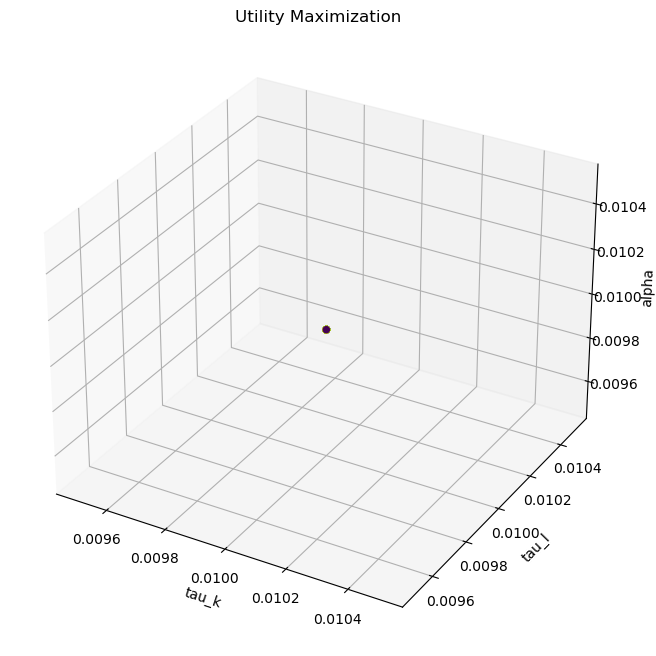

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of alpha and generate the grid
alpha_range = np.linspace(0.01, 1 - 𝜂, 10)
𝜅_grid = (1 - 𝜂 - alpha_range[:, np.newaxis])
tau_l_grid2 = np.linspace(0.01, 0.99, 10)
tau_k_grid2 = np.linspace(0.01, 0.99, 10)
max_utility = float('-inf')
max_tau_l = 0
max_tau_k = 0

utility_values = []

for tau_k in tau_k_grid2:
    for tau_l in tau_l_grid2:
        for alpha in alpha_range:
            for kappa in 𝜅_grid:
                delta3 = r * (1 - tau_k) - 0.04
                g_share3 = tau_l * 𝜂 + tau_k * alpha
                g3 = g_share3 * (y / x**kappa)
                c3 = y - g3 - delta3 * k
                x3 = (1 - tau_k) * w * (1 - l) / c3
                gamma3 = 1 / (1 + x3)
                beta3 = 1 / (1 + alpha * kl_ratio**(alpha - 1) * (1 - tau_k) - delta)

                U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)

                if np.max(U) > max_utility:
                    max_utility = np.max(U)
                    max_tau_l = tau_l
                    max_tau_k = tau_k

                    max_indices = np.unravel_index(np.argmax(U), U.shape)
                    max_alpha = alpha_range[max_indices[0]]
                    utility_values.append((max_tau_k, max_tau_l, max_alpha, max_utility))

# Print the pair of tax rates that maximizes the agent's steady-state utility
print(f"The pair of tax rates that maximizes utility: (tau_l = {max_tau_l:.2f}, tau_k = {max_tau_k:.2f})")

# Extract the variables for plotting
tau_k_values, tau_l_values, alpha_values, utility = zip(*utility_values)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tau_k_values, tau_l_values, alpha_values, c=utility, cmap='viridis')
ax.set_xlabel('tau_k')
ax.set_ylabel('tau_l')
ax.set_zlabel('alpha')
ax.set_title('Utility Maximization')
plt.show()

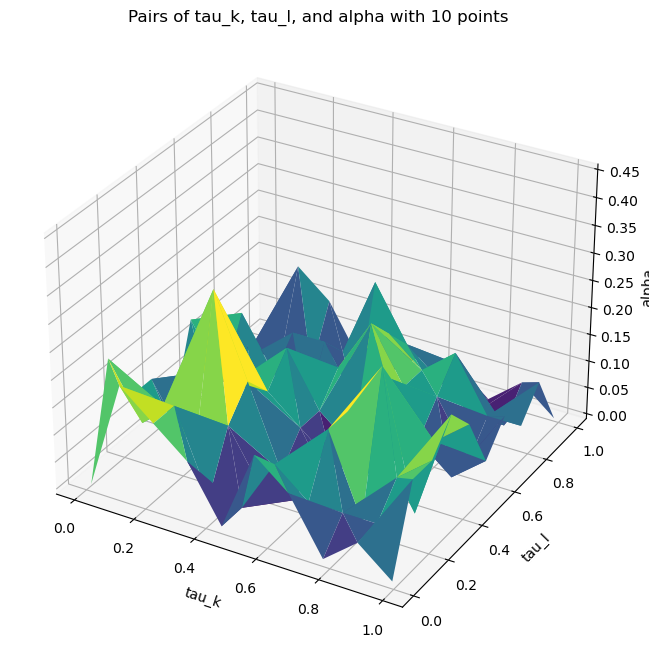

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of alpha and generate the grid
alpha_range = np.linspace(0, 1 - 𝜂, 10)
𝜅_grid = (1 - 𝜂 - alpha_range[:, np.newaxis])
tau_l_grid2 = np.linspace(0.01, 0.99, 10)
tau_k_grid2 = np.linspace(0.01, 0.99, 10)

# Create a meshgrid for tau_k, tau_l, and alpha
tau_k_values, tau_l_values, alpha_values = np.meshgrid(tau_k_grid2, tau_l_grid2, alpha_range)


tau_k_values = tau_k_values.flatten()
tau_l_values = tau_l_values.flatten()
alpha_values = alpha_values.flatten()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(tau_k_values, tau_l_values, alpha_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('tau_k')
ax.set_ylabel('tau_l')
ax.set_zlabel('alpha')
ax.set_title('Pairs of tau_k, tau_l, and alpha with 10 points')
plt.show()

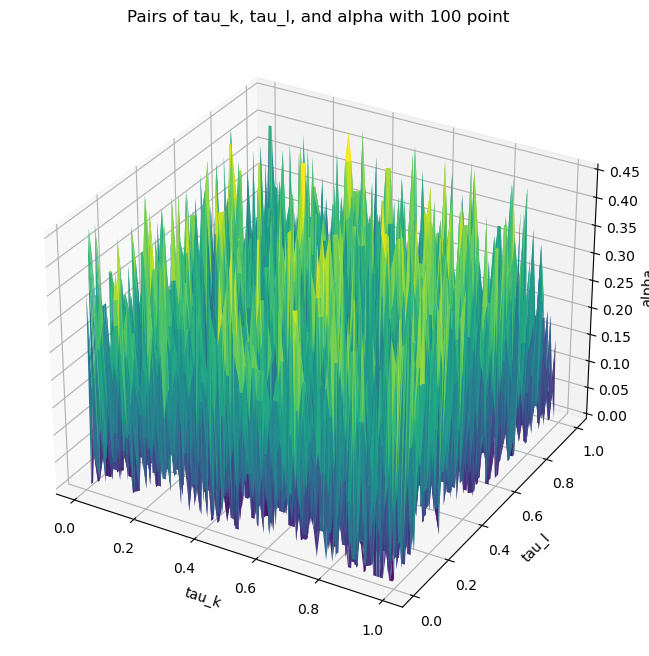

In [172]:
tau_l_grid3 = np.linspace(0.01, 0.99, 100)
tau_k_grid3 = np.linspace(0.01, 0.99, 100)

# Create a meshgrid for tau_k, tau_l, and alpha
tau_k_values, tau_l_values, alpha_values = np.meshgrid(tau_k_grid3, tau_l_grid3, alpha_range)

# Reshape the arrays to be 2-dimensional
tau_k_values = tau_k_values.flatten()
tau_l_values = tau_l_values.flatten()
alpha_values = alpha_values.flatten()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(tau_k_values, tau_l_values, alpha_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('tau_k')
ax.set_ylabel('tau_l')
ax.set_zlabel('alpha')
ax.set_title('Pairs of tau_k, tau_l, and alpha with 100 point')
plt.show()

In [173]:
import numpy as np
from tabulate import tabulate
# Store all pairs of tau_k_grid2, tau_l_grid2, and alpha
all_pairs = []
for tau_k in tau_k_grid2:
    for tau_l in tau_l_grid2:
        for alpha in alpha_range:
            all_pairs.append((tau_k, tau_l, alpha))

# Format the pairs into a table
table = tabulate(all_pairs, headers=['tau_k', 'tau_l', 'alpha'], tablefmt='fancy_grid')

# Print the table
print(table)

╒══════════╤══════════╤═════════╕
│    tau_k │    tau_l │   alpha │
╞══════════╪══════════╪═════════╡
│ 0.01     │ 0.01     │    0    │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.05 │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.1  │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.15 │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.2  │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.25 │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.3  │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.35 │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.4  │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.01     │    0.45 │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.118889 │    0    │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.118889 │    0.05 │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0.118889 │    0.1  │
├──────────┼──────────┼─────────┤
│ 0.01     │ 0

In [174]:
import numpy as np
from tabulate import tabulate

# Define the range of alpha and generate the grid
alpha_range = np.linspace(0.01, 1 - 𝜂, 10)
𝜅_grid = (1 - 𝜂 - alpha_range[:, np.newaxis])
tau_l_values = np.arange(0.01, 1, 10)  # Adjust the range and step size for tau_l
tau_k_values = np.arange(0.01, 1, 10)  # Adjust the range and step size for tau_k
max_utility = float('-inf')

utility_values = []

for tau_k in tau_k_values:
    for tau_l in tau_l_values:
        for alpha in alpha_range:
            for kappa in 𝜅_grid:
                delta3 = r * (1 - tau_k) - 0.04
                g_share3 = tau_l * 𝜂 + tau_k * alpha
                g3 = g_share3 * (y / x**kappa)
                c3 = y - g3 - delta3 * k
                x3 = (1 - tau_k) * w * (1 - l) / c3
                gamma3 = 1 / (1 + x3)
                beta3 = 1 / (1 + alpha * kl_ratio**(alpha - 1) * (1 - tau_k) - delta)

                U = beta3 * ((c3 ** gamma3) * (1 - l) ** (1 - gamma3) / (1 - sigma)) ** (1 - sigma)

                if np.max(U) > max_utility:
                    max_utility = np.max(U)
                    max_tau_l = tau_l
                    max_tau_k = tau_k

                    max_indices = np.unravel_index(np.argmax(U), U.shape)
                    max_alpha = alpha_range[max_indices[0]]
                    utility_values.append((tau_k, tau_l, alpha, np.max(U)))

# Format the pairs and utility into a table
table = tabulate(utility_values, headers=['tau_k', 'tau_l', 'alpha', 'Utility'], tablefmt='fancy_grid')

# Print the table
print(table)

╒═════════╤═════════╤═══════════╤═══════════╕
│   tau_k │   tau_l │     alpha │   Utility │
╞═════════╪═════════╪═══════════╪═══════════╡
│    0.01 │    0.01 │ 0.01      │  -2.18906 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.18903 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.189   │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.18898 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.18895 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.18892 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.1889  │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.18887 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │  -2.18885 │
├─────────┼─────────┼───────────┼───────────┤
│    0.01 │    0.01 │ 0.01      │ 

## <font color='blue'><center><ins>Explanation</ins></center></font>
***
Increasing the value of alpha (represented by the variable 𝛼) in the Neoclassical Growth Model has a positive effect on utility (U), leading to an increase in welfare. This implies that as alpha increases, the agent's utility improves, indicating a higher level of well-being. For instance, when alpha is set to 0.01, the utility is -2.18, while increasing alpha to 0.45 results in a utility of -1.16, demonstrating a substantial improvement in welfare. Conversely, the impact of increasing tau_l (represented by the variable 𝜏_l) on utility is negative. As tau_l increases, utility decreases, indicating a reduction in the agent's welfare. The relationship between tau_l and utility reveals that higher levels of taxation on labor income adversely affect the agent's well-being. Therefore, it is crucial for policymakers to consider the trade-offs associated with tax rates and their impact on utility when designing taxation policies to ensure optimal economic efficiency and welfare.

8. Write a one-page report summarizing your findings. Think about this as an executive summary you would present to policymakers. 

- *What is this project about* - describe the main topic, the issues you are interested in (to some extent this is outlined at the beginning of this document)


- *Outline your approach* - present the model and the numerical solution method in words (avoid equations, technical terms - write this for someone that is not necessarily an economist or knows Python)


- *Describe the project key outcomes* - present the main results of this projects and what you have learned from it.


- *Wrap up with a conclusion* - the importance of the work, policy implications and recommendations.